## learning-AI101 : topic3_1

이미지 학습 신경망 : 합성곱 신경망, GAN, YOLO... (딥페이크)  
신경망에 input data를 넣기 위해선 np.reshape()와 함께 숫자 데이터로 전처리 과정을 거쳐야함  
이미지의 한 픽셀은 색깔값 (RGB값)으로 이루어져 있기 때문에 모든 픽셀을 색깔값으로 전처리

**컬러** : (0, 0, 0) ~ (255, 255, 255) : 0일수록 검정, 255일수록 하양 (빛색)  
**흑백** : 0~255 하나의 숫자  

흑백이 학습시간이 적게 걸려서 학습할 때 흑백으로 변환 후에 집어넣는 경우가 많음

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
import requests
import numpy as np
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

구글 tensorflow에서 지원해주는 쇼핑몰 이미지 데이터셋으로 classification 모델 만들기

In [11]:
df = tf.keras.datasets.fashion_mnist.load_data()
print(df)

# ( (trainX, trainy), (testX, testy) ...) 
# trainX는 훈련용데이터, trainy는 훈련용데이터의 정답 / testX는 예측용데이터, testy는 예측용데이터의 정답

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [19]:
# df에 있는 튜플들 정보 가져오기
(train_X, train_y), (test_X, test_y) = df
print(train_X[0]) # train_X[index] : index번째의 훈련용이미지 rgb값 정보

print ("#" * 10)

print (train_X.shape, train_y.shape)
print (test_X.shape, test_y.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

**현재 쇼핑몰 mnist 데이터셋 shape 분석**   
(60000, 28, 28) (60000,)  
(10000, 28, 28) (10000,)  
* train_X : 28 by 28 행렬의 이미지가 60000개
* train_y : 정답 60000개 (label)
* test_X : 28 by 28 행렬의 이미지가 10000개
* test_y : 정답 10000개 (label)
* label의 종류 : 0 ~ 9
* 
  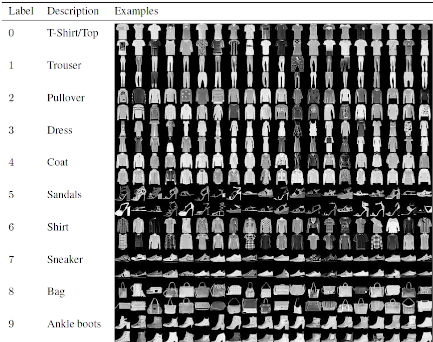

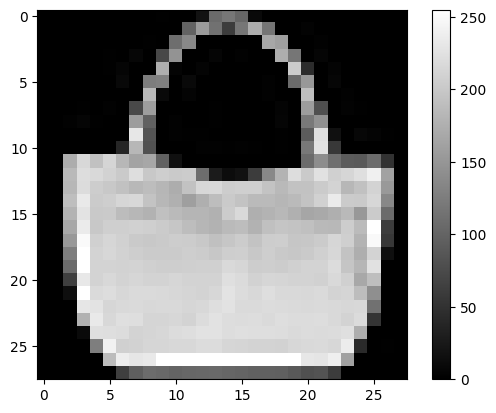

In [37]:
# 이미지 보기
plt.imshow(train_X[100]) #이미지 보여주는 메소드
plt.colorbar() #0 ~ 250개의 칼라 코딩
plt.gray() #흑백으로 출력

------------

### 1) 모델 만들기
#### 사진이 각각 어느 카테고리에 속할 건지 확률 출력 
[0.1, 0.3, 0.1 ...] (이 사진이 티셔츠일 확률 10프로, trouser 확률 30프로...)

In [54]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Anke boot']

# 확률예측문제
# 1) 마지막 레이어 노드수를 카테고리 갯수만큼
# 2) sigmoid or softmax output layer activation 사용하기

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(28, 28), activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Flatten(), # 1D로 바꾸기 (np.reshape())
    tf.keras.layers.Dense(10, activation="softmax"), # 10개로 한 이유가 class_names가 10개니깐
])

* sigmoid를 사용할 때 : binary situation일 때 + 출력노드가 1개일때 (대학원 붙는다 / 안붙는다)
  * activation은 sigmoid, compile할 때 loss는 평균제곱오차  
* softmax를 사용할 때 : convolutional situation일 때 + 출력노드가 2개 이상일 때 (이럴 확률도 있고, 저럴 확률도 있고...)
  * activation은 softmax, compile할 때 loss는 cross entropy or sparse cross entropy

### 2) 컴파일 후 학습하기

In [58]:
# 모델 아웃라인 출력해보기}
# summary()를 출력하기 위해선 Dense에 input_shape를 작성해야 한다
# input layer에 집어넣을 모양 == input_shape
model.summary()

# model의 결괏값이 1D가 되기 위해선 flatten 과정이 필수

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 28, 128)           3712      
                                                                 
 dense_19 (Dense)            (None, 28, 64)            8256      
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dense_20 (Dense)            (None, 10)                17930     
                                                                 
Total params: 29898 (116.79 KB)
Trainable params: 29898 (116.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit (train_X, train_y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2827 - accuracy: 0.7775
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5051 - accuracy: 0.8249
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4764 - accuracy: 0.8327
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4466 - accuracy: 0.8441
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4115 - accuracy: 0.8553


In [61]:
model.predict (np.array(test_X[0]))

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "dense_20" is incompatible with the layer: expected axis -1 of input shape to have value 1792, but received input with shape (None, 64)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28), dtype=uint8)
      • training=False
      • mask=None
